## Target: Choose best model to predict Wine Quality based on historical sensored data.

We'll compare the accuracy across different ML models. 

*Note: There won't be Parameter Tunning phase in this analysis.*

*Dataset* origin: UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/wine). 

In [173]:
import pandas as pd
import numpy as np
import pylab as pl #chart lib
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (2).csv


In [0]:
#reading and converting dataset into a dataframe
file ="winequality-red.csv"
df= pd.read_csv(file, sep=';')

In [175]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [176]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [177]:
df.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


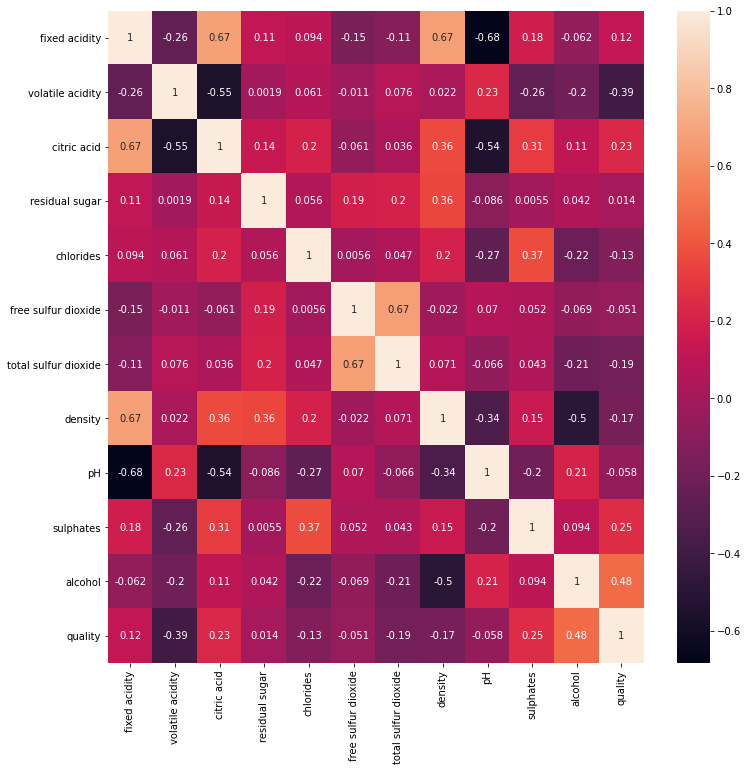

In [178]:
#CORR Matrix ploted
import seaborn as sn

plt.figure(figsize=(12,12))
matriz_correlacao=df.corr()
sn.heatmap(matriz_correlacao, annot=True)
plt.show()

In [179]:
df['residual sugar'].isnull().sum()

0

In [180]:
df['residual sugar'].median()

2.2

In [181]:
high_quality = df['quality'].eq(5)
high_quality.sum()

681

In [182]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [183]:
df.shape

(1599, 12)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
#setting up features and labels
x = df.iloc[:, :-1].values #input data
y = df.iloc[:, -1].values #output data

In [0]:
#applying data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaler.fit(x)

x = scaler.transform(x)

In [187]:
fixed_acidity_normalized = x[:,0]
min(fixed_acidity_normalized)

0.0

In [0]:
#split train - test dataset
from sklearn.model_selection import train_test_split 
#splitting and setting 30% data for testing
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1,test_size=0.30) 

Model 1 - KNN

In [189]:
#trainning the model
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5) #setting 5 near neighbors
clf_KNN.fit(X_train, y_train) #applying classification

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#doing some prediction
y_pred_KNN = clf_KNN.predict(X_test)

In [191]:
#building confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[  1   0   1   0   0   0]
 [  0   1  14   5   1   0]
 [  0   0 148  54   5   0]
 [  0   1  71 102  21   0]
 [  0   1   9  23  19   0]
 [  0   0   0   1   2   0]]
              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.66       207
           6       0.55      0.52      0.54       195
           7       0.40      0.37      0.38        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.36      0.39       480
weighted avg       0.55      0.56      0.55       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


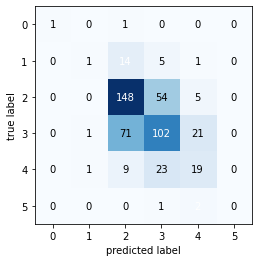

In [192]:
#lets plot confusion matrix
matrix = confusion_matrix(y_test, y_pred_KNN)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matrix)
pl.savefig('knnConfusionMatrix.png')
pl.show()

Model 2 - Decision Tree

In [193]:

#trainning the model
from sklearn.tree import DecisionTreeClassifier
clf_Dtree = DecisionTreeClassifier() 
clf_Dtree.fit(X_train, y_train) #applying classification

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [194]:
#doing some prediction
y_pred_DT = clf_Dtree.predict(X_test)
#building confusion matrix 
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))

[[  0   0   0   2   0   0]
 [  2   2  10   5   2   0]
 [  1  11 142  43  10   0]
 [  1   5  62 107  20   0]
 [  0   0   4  14  32   2]
 [  0   0   0   0   2   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.11      0.10      0.10        21
           5       0.65      0.69      0.67       207
           6       0.63      0.55      0.58       195
           7       0.48      0.62      0.54        52
           8       0.33      0.33      0.33         3

    accuracy                           0.59       480
   macro avg       0.37      0.38      0.37       480
weighted avg       0.59      0.59      0.59       480



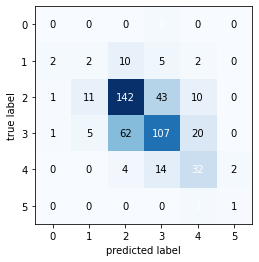

In [195]:
#lets plot confusion matrix
matrix = confusion_matrix(y_test, y_pred_DT)
fig, ax = plot_confusion_matrix(conf_mat=matrix)
pl.savefig('DTConfusionMatrix.png')
pl.show()

Model 3 - Random Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(max_depth=10, random_state=1)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [197]:
#doing some prediction
y_predForest = clf_forest.predict(X_test)
#building confusion matrix 
print(confusion_matrix(y_test, y_predForest))
print(classification_report(y_test, y_predForest))

[[  0   0   2   0   0   0]
 [  0   0  14   7   0   0]
 [  0   0 167  38   2   0]
 [  0   0  46 136  13   0]
 [  0   0   5  24  23   0]
 [  0   0   0   1   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.66      0.70      0.68       195
           7       0.57      0.44      0.50        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.68      0.66       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


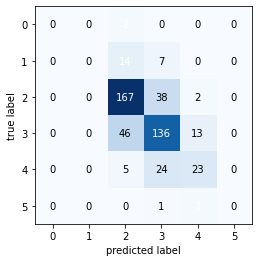

In [198]:
#lets plot confusion matrix
matrix = confusion_matrix(y_test, y_predForest)
fig, ax = plot_confusion_matrix(conf_mat=matrix)
pl.savefig('RanForestConfusionMatrix.png')
pl.show()

Model 4 - SVM

In [199]:
from sklearn.svm import SVC
clf_svm=SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [200]:
#doing some prediction
y_pred_SVM = clf_svm.predict(X_test)
#building confusion matrix 
print(confusion_matrix(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

[[  0   0   2   0   0   0]
 [  0   0  16   5   0   0]
 [  0   0 177  30   0   0]
 [  0   0  91 104   0   0]
 [  0   0   6  46   0   0]
 [  0   0   0   3   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.61      0.86      0.71       207
           6       0.55      0.53      0.54       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.49      0.59      0.53       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


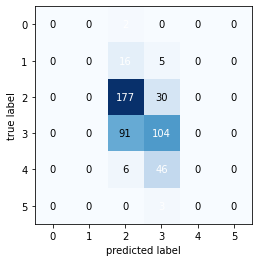

In [201]:
#lets plot confusion matrix
matrix = confusion_matrix(y_test, y_pred_SVM)
fig, ax = plot_confusion_matrix(conf_mat=matrix)
pl.savefig('SVMConfusionMatrix.png')
pl.show()

Model 5 - Neural Network - MLP

In [202]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [203]:
#doing some prediction
y_pred_MLP = clf_mlp.predict(X_test)
#building confusion matrix 
print(confusion_matrix(y_test, y_pred_MLP))
print(classification_report(y_test, y_pred_MLP))

[[  0   0   2   0   0   0]
 [  0   0  15   5   1   0]
 [  0   0 165  42   0   0]
 [  0   0  73 111  11   0]
 [  0   0   5  35  12   0]
 [  0   0   0   1   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.80      0.71       207
           6       0.57      0.57      0.57       195
           7       0.46      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.26       480
weighted avg       0.56      0.60      0.57       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


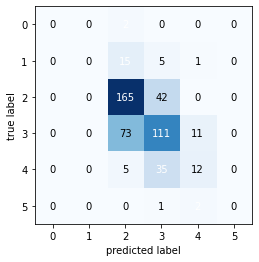

In [204]:
#lets plot confusion matrix
matrix = confusion_matrix(y_test, y_pred_MLP)
fig, ax = plot_confusion_matrix(conf_mat=matrix)
pl.savefig('NeuralNetConfusionMatrix.png')
pl.show()

# **New Strategy - Lets simplify quality grades as GOOD or BAD, instead of numeric grades. **

BAD WINE ( Grade 3,4,5 )      GOOD WINE ( Grade 6,7,8)

Model 6 - Random Forest (New Label GOOD OR BAD)

In [0]:
#transforming dataset GOOD = ZERO AND BAD = 1
#other way
##transforming Quality grades from Numeric to Category
#df_good_bad[['quality']] = df_good_bad[['quality']].replace([3,4,5], 'Bad')
#df_good_bad[['quality']] = df_good_bad[['quality']].replace([6,7,8], 'Good')

df_good_bad=df.copy()
df_good_bad['nova_qualidade']=df_good_bad['quality'].apply(lambda x: 0 if x<=5 else 1)

In [0]:
#drop quality column
df_good_bad.drop(labels=['quality'],axis=1,inplace=True)

In [207]:
df_good_bad.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,nova_qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [208]:
df_good_bad.shape

(1599, 12)

In [0]:
#setting up features and labels
x = df_good_bad.iloc[:, :-1].values #input data
y = df_good_bad.iloc[:, -1].values #output data

In [0]:
#applying minmax
#applying data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaler.fit(x)

x = scaler.transform(x)


In [0]:
#split train - test dataset
from sklearn.model_selection import train_test_split 
#splitting and setting 30% data for testing
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1,test_size=0.30) 

In [212]:
#Now Lets Apply Random Forest Model AGAIN!
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(max_depth=10, random_state=1)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [213]:
#doing some prediction
y_predForest = clf_forest.predict(X_test)
#building confusion matrix 
print(confusion_matrix(y_test, y_predForest))
print(classification_report(y_test, y_predForest))

[[186  44]
 [ 50 200]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       230
           1       0.82      0.80      0.81       250

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



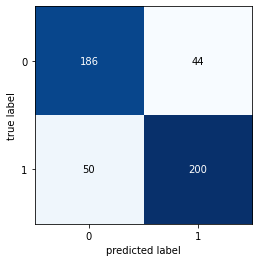

In [214]:
#lets plot confusion matrix
matrix = confusion_matrix(y_test, y_predForest)
fig, ax = plot_confusion_matrix(conf_mat=matrix)
pl.savefig('RanForestConfusionMatrix_Label_GorB.png')
pl.show()